<h1>Learning project</h1>
<h3>Song data from Rolling Stone top 500 tracks</h3>
<p>The obective of the project was to learn to use my newfound python skills to work out certain key objectives:</p>
<ul>
<li>Consume API's.</li>
<li>Clean data sets.</li>
<li>Learn pandas data manipulation.</li>
<li>Create understandable visualizations.</li>
</ul>

<ul>
<li><em>The json and requests import is for handling json data.</em></li>
<li><em>all analysis and cleaning will be done using pandas.</em></li>
<li><em>All visualizations will be done using the seaborn library.</em></li>
</ul>

In [5]:
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h4>The guitar party api gives data regarding a particular song.</h4>
<ol>
<li><em>Use protected api's.</em></li>
<li><em>Pick out data from nested json strings.</em></li>
</ol>

In [73]:

url = "http://api.guitarparty.com/v2/songs/?query=Satisfaction"
headers = {'Guitarparty-Api-Key': '4b6e941c192e644e3dbde22520649ba9004f62a4'}
t = requests.get(url, headers=headers)
response=json.loads(t.text)

for objects in response['objects']:
    for chords in objects['chords']:
        print (chords.get('name'))


E
D
A
B7


<ul>
<li><em>The guitar party api is throttled at 150 requests an hour.</em></li>
<li><em>To tackle this I divided the top 500 into blocks of 150.</em></li>
<li><em>We now pass each of the lists in turn into the method for getting the list of chords used.</em></li>
</ul>

In [77]:
df=pd.read_csv('top500.csv',names=['song','artist'])
songList=df['song'].tolist()
listOne=songList[0:150]
listTwo=songList[151:300]
listThree=songList[301:450]
listFour=songList[451:500]

In [76]:

chordNames=[]
for song in listFour:
    url = "http://api.guitarparty.com/v2/songs/?query="+song
    headers = {'Guitarparty-Api-Key': '4b6e941c192e644e3dbde22520649ba9004f62a4'}
    t = requests.get(url, headers=headers)
    test=json.loads(t.text)
    for objects in test['objects']:
        for chords in objects['chords']:
            chordNames.append(chords['name'])

<em>The following code is to write the lists into a csv file to create a master a list of chords of all the 500 songs.</em>

In [19]:
names = pd.DataFrame(chordNames, columns=["colummn"])
names.to_csv('chordNames4.csv', index=False)

<h5><em>This block of code collates the separate csv files and concatenates them into one master file</em></h5>

In [3]:
path =r'D:\projects\top40' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
masterChordList = pd.concat((pd.read_csv(f) for f in allFiles))

In [9]:
masterChordList.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6125 entries, 0 to 941
Data columns (total 1 columns):
colummn    6125 non-null object
dtypes: object(1)
memory usage: 95.7+ KB


In [6]:
finalList = pd.read_csv('finalList.csv',names=['chords'])

<h5>Data cleaning</h5>
<ul>
<li><em>The final list contains some faulty data.</em></li>
<li><em>This is represented by $Am#7b5 : does not exist$.</em></li>
<li><em>To clean such data the following function has been written to strip out the unwanted bits.</em></li>
</ul>

In [10]:
def cleanChordNames(chords):
    cleanChord=chords.split(':')[0]
    return cleanChord
clean=finalList['chords'].apply(lambda chords: cleanChordNames(chords))

In [11]:
clean=clean.tolist()

 - *We now pass the clean list through a counter to recieve a dict of all chords with their counts.*
 - *This is then imported via the pandas DataFrame construct.*
 - *This DataFrame is then Reindexed and columns renamed for greater legibility.*
 - *This final readable reindexed column is passed into a seaborn barplot which is one option for making categorical plots.*
 - *This final image is then saved into the local project folder for distribution elsewhere.*

In [13]:
import collections
counter= collections.Counter(chord for chord in clean)
print(counter)

In [37]:
test=pd.DataFrame.from_dict(counter,orient='index')

In [63]:
#for legibility in plotting we will weed out the chords used less than 10 times accross the dataset.
cleanTest=test[test[0]>10].sort_values(0, axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
cleanTest.head()

,0
C,788
G,562
F,502
G7,382
D7,365


In [64]:
cleanTest = cleanTest.reset_index()
cleanTest.head()

,index,0
0,C,788
1,G,562
2,F,502
3,G7,382
4,D7,365


In [65]:
cleanTest.rename(columns={'index': 'chord', 0: 'count'}, inplace=True)

In [66]:
cleanTest.head()

,chord,count
0,C,788
1,G,562
2,F,502
3,G7,382
4,D7,365


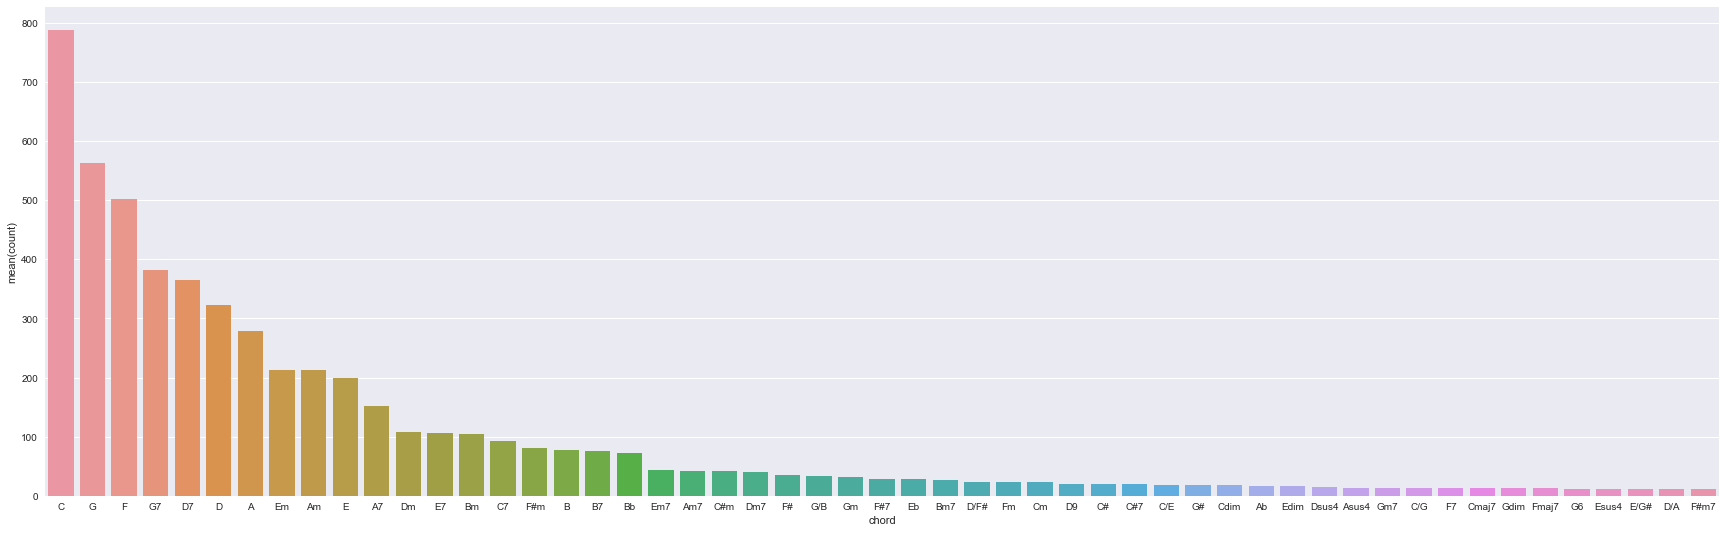

In [69]:
plt.figure(figsize=(30,9))
chordDist=sns.barplot(x='chord',y='count',data=cleanTest)

In [70]:
fig= chordDist.get_figure()
fig.savefig('chordDist.png')

#### In conclusion all the learning objectives were acheived with a far greater understaning of pandas manipulation.
#### The current project did not challenge in data cleansing. Next project will be chosen to get more familiar in those aspects.
#### There was an added learning of markdown which i did not anticipate!
#### All in all a pretty succesful foray into trying my own bit at data analysis! appreciate any comments and reviews on the abyssmal choices and mistakes i must surely have made :P